In [1]:
import networkx as nx
import centrality_utils as cu
import scipy.io
import mat73
import nbtw

from matplotlib import pyplot as plt
from scipy import sparse

In [2]:
Data    = scipy.io.loadmat('GD96_c.mat')
A       = Data['Problem']['A']

In [3]:
type(A)

numpy.ndarray

In [4]:
A       = sparse.csr_matrix(A.any())

In [5]:
G0      = nx.Graph(A)

In [6]:
CA = cu.CentralityAttributes(A, G0)

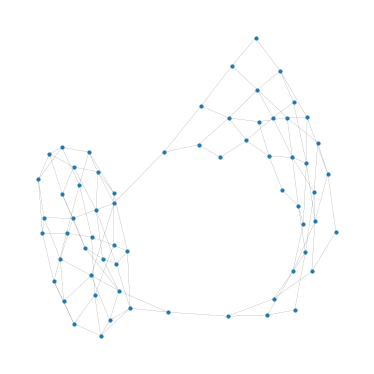

In [7]:
fig0 = plt.figure(figsize=(5,5))
nx.draw(CA.Graph, node_size=10, width=0.1) #with_labels=True,
plt.savefig("GD96_init.jpg", format="jpg", bbox_inches="tight")

In [8]:
#KatzNX, alpha_grid = cu.KatzCentralityNX(CA.AdjacencyMatrix, CA.Graph)

In [9]:
#cu.VisualizeNodeCentrality(KatzNX,
#                           alpha_grid,
#                           "Katz centralities of all nodes, computed with Networkx library",
#                           "Alpha parameter",
#                           "Katz centrality measure",
#                           step=5) 

In [10]:
KatzV2, alpha_gridV2, cond_numV2 = cu.KatzCentralityV2(CA.AdjacencyMatrix, CA.Graph)

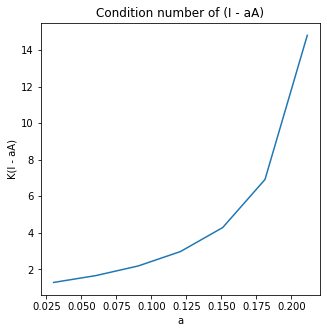

In [11]:
cu.ShowConditionNumber(alpha_gridV2, cond_numV2, "(I - aA)", "condGD96.jpg")

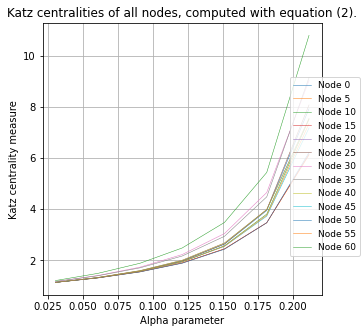

In [12]:
cu.VisualizeNodeCentrality(KatzV2,
                           alpha_gridV2,
                           "Katz centralities of all nodes, computed with equation (2).",
                           "Alpha parameter",
                           "Katz centrality measure", 
                           step=5,
                           filename="katz_vs_alp2.jpg")

In [13]:
NBTcent, grid_t, cond_numNBT = cu.NBTCentrality(CA.AdjacencyMatrix)

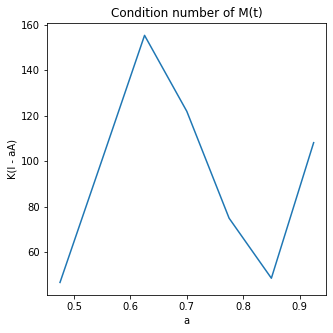

In [14]:
cu.ShowConditionNumber(grid_t, cond_numNBT, "M(t)", "condGD96NBT.jpg")

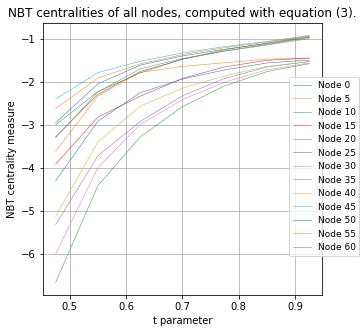

In [15]:
cu.VisualizeNodeCentrality(NBTcent,
                           grid_t,
                           "NBT centralities of all nodes, computed with equation (3).",
                           "t parameter",
                           "NBT centrality measure",
                           step=5,
                           filename="nbt_vs_t2.jpg") #

In [16]:
nbt_walks = nbtw.nbtw(CA.AdjacencyMatrix.toarray(), 12)
"""for i in range(nbt_walks.shape[0]):
    for j in range(nbt_walks.shape[1]):
        print(f"[{i,j}]", nbt_walks[i, j])"""

'for i in range(nbt_walks.shape[0]):\n    for j in range(nbt_walks.shape[1]):\n        print(f"[{i,j}]", nbt_walks[i, j])'

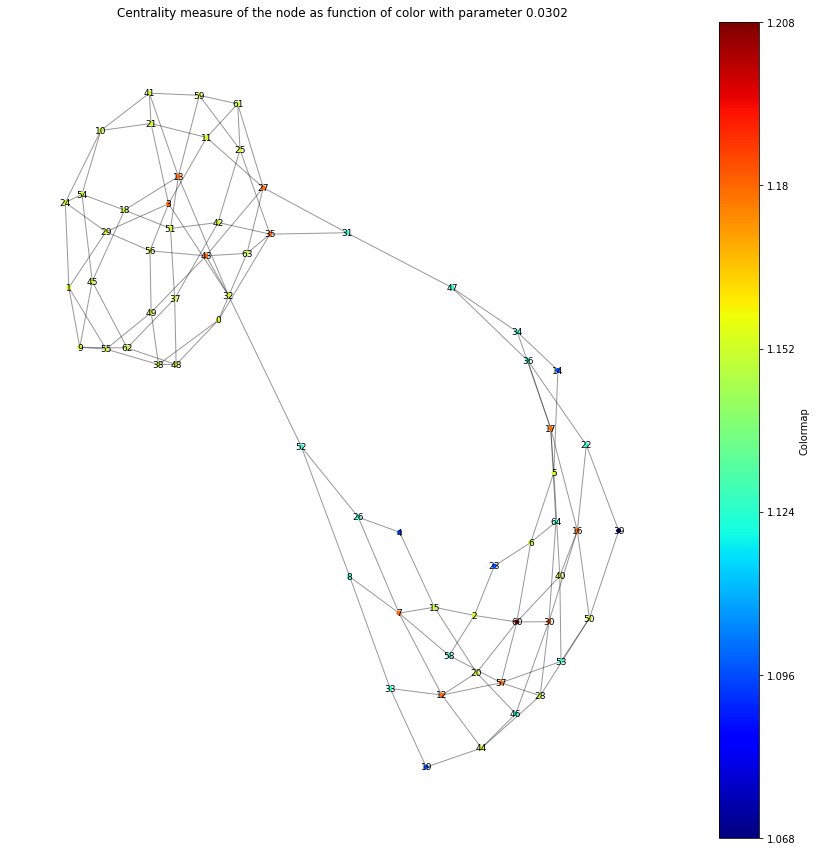

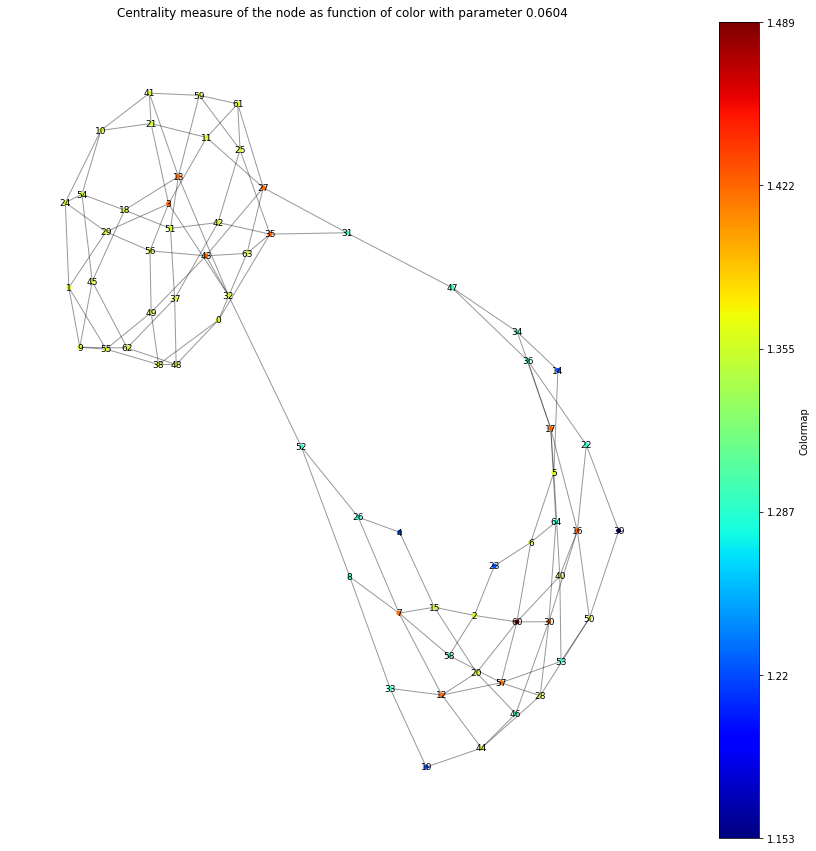

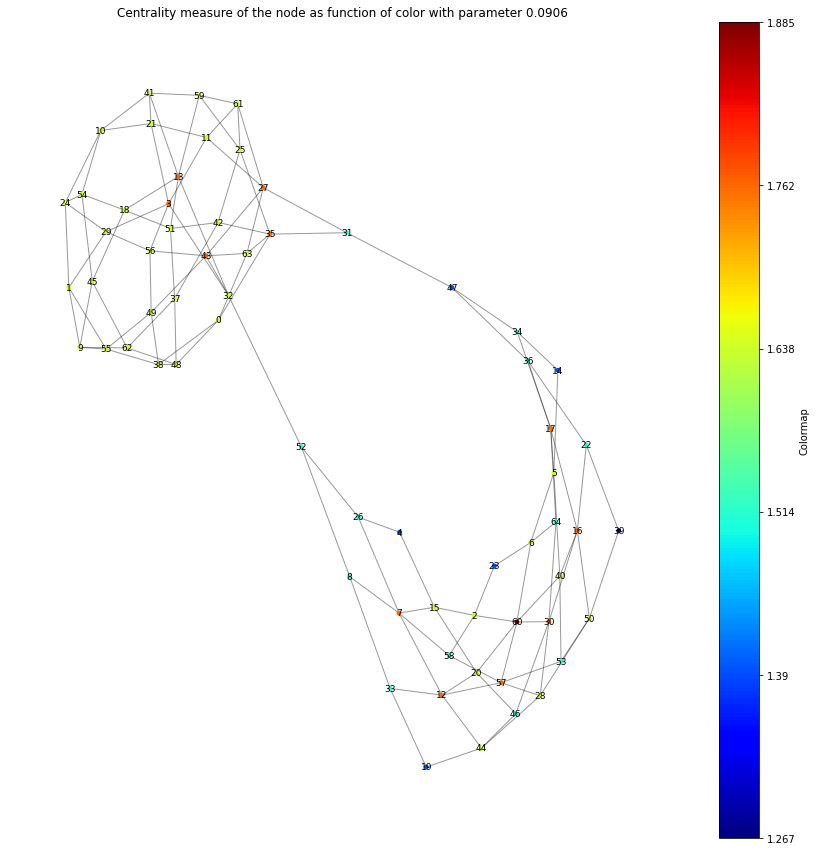

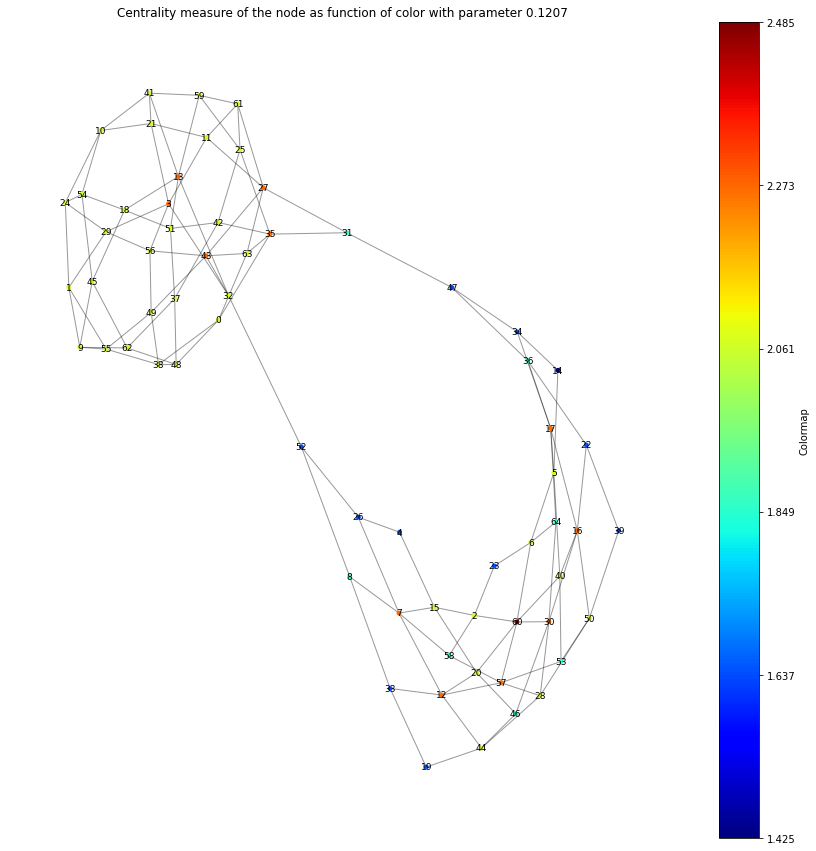

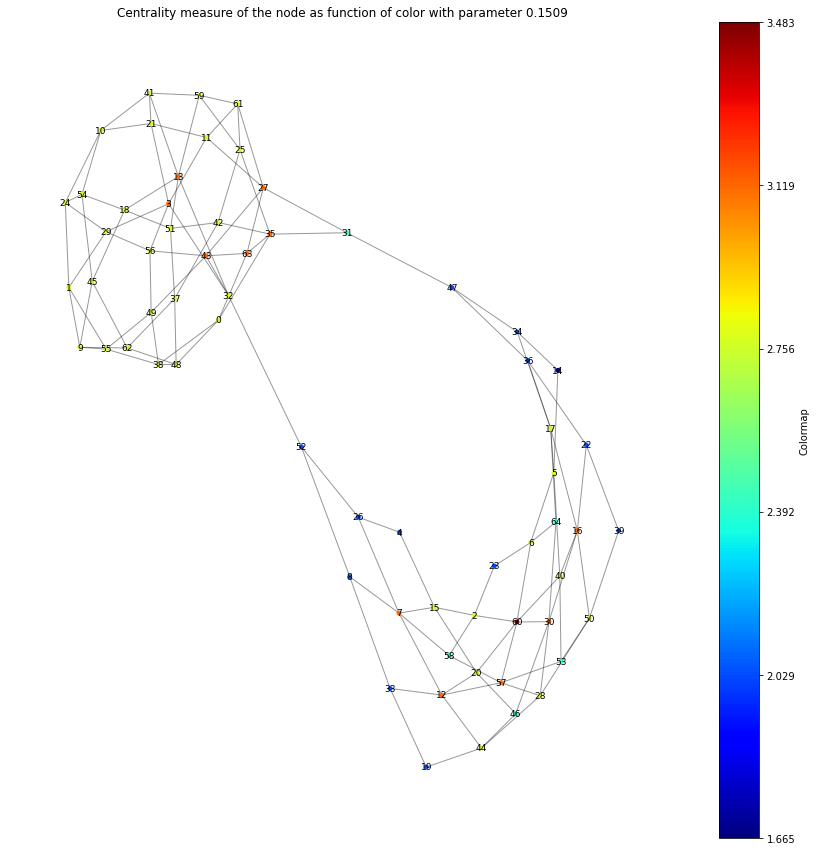

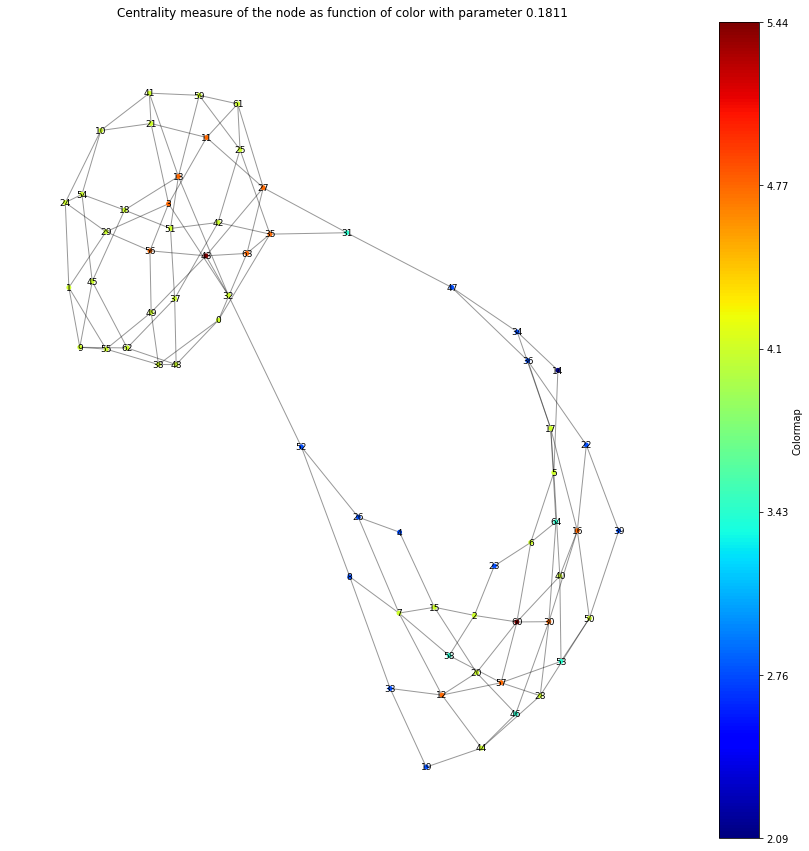

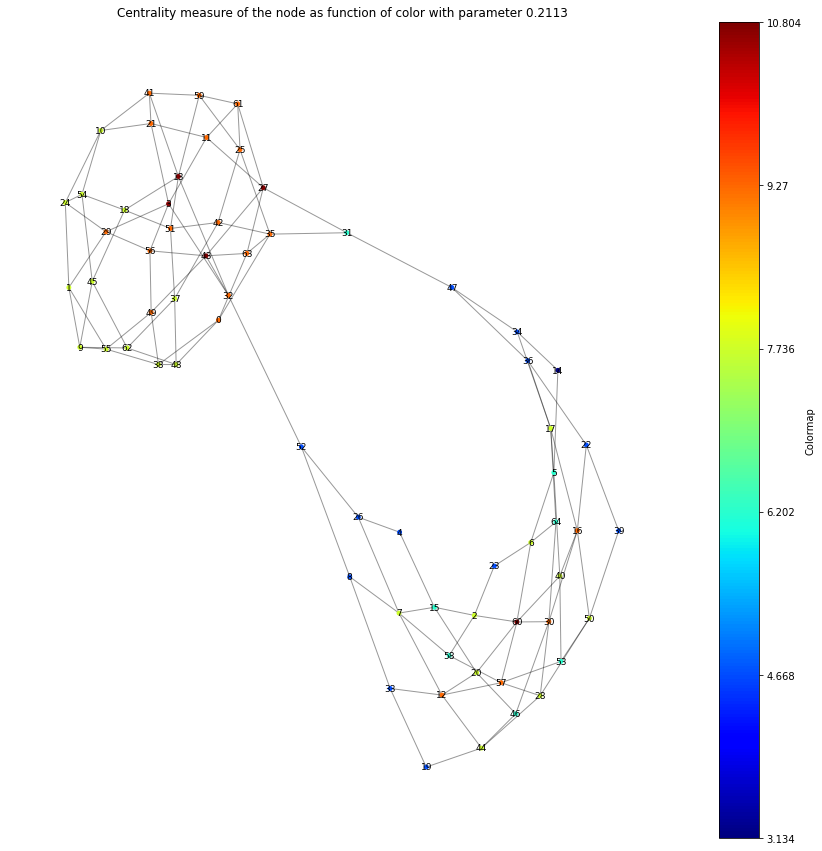

In [17]:
cu.DisplayCentralitiesInGraph(KatzV2, CA.Graph, alpha_gridV2, filename="KatzGD96FC")

In [18]:
print(KatzV2[10,6])
print(KatzV2[10,5])

7.523493240847655
3.8088625144271715


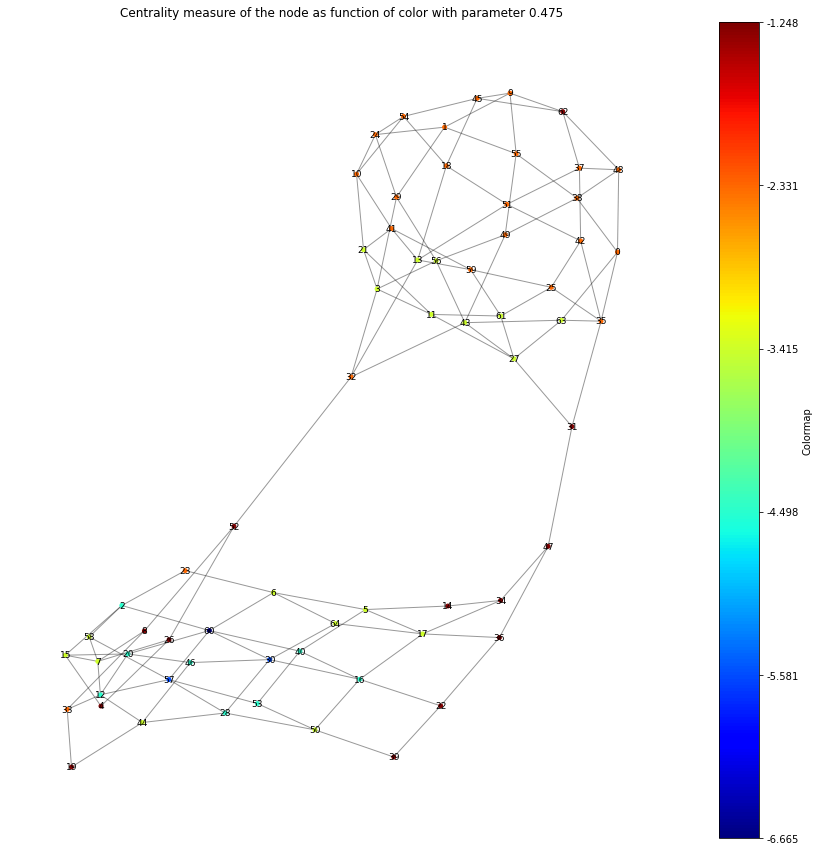

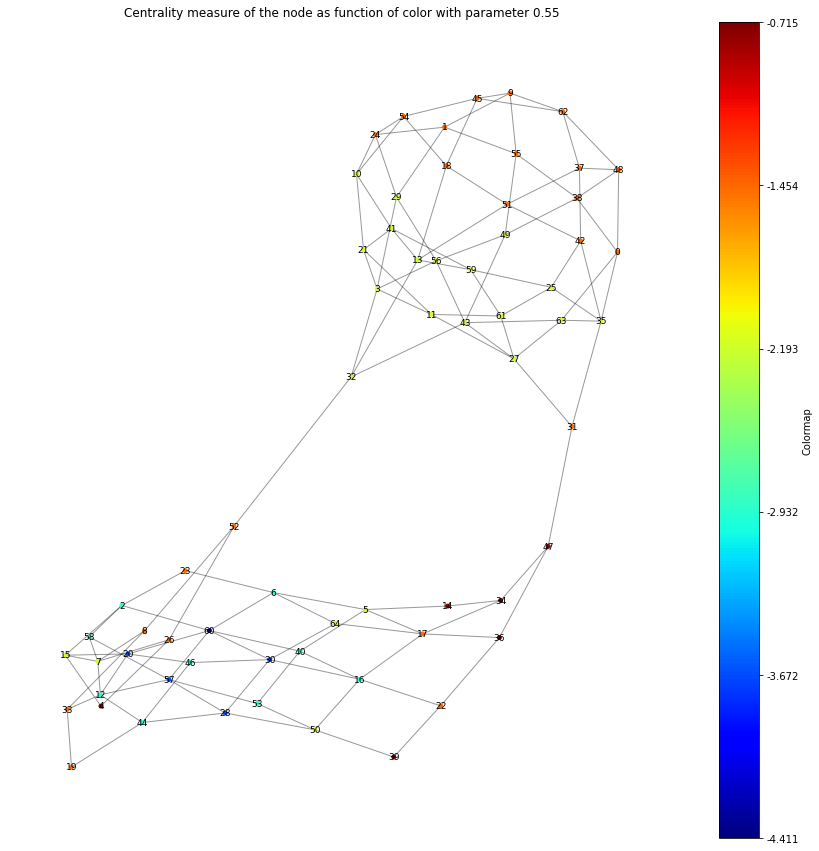

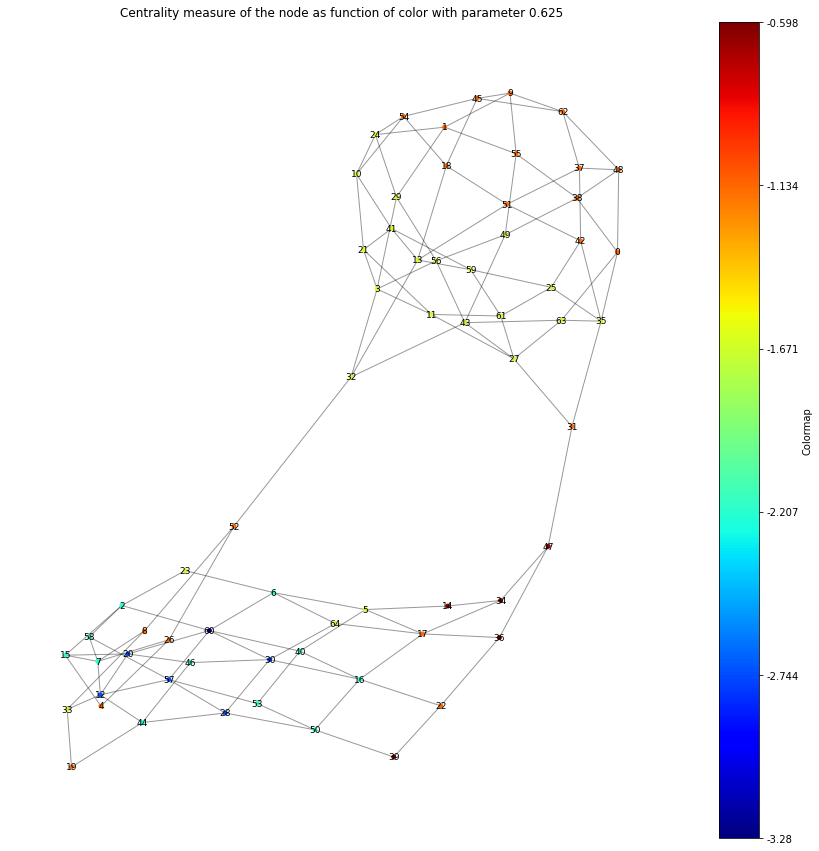

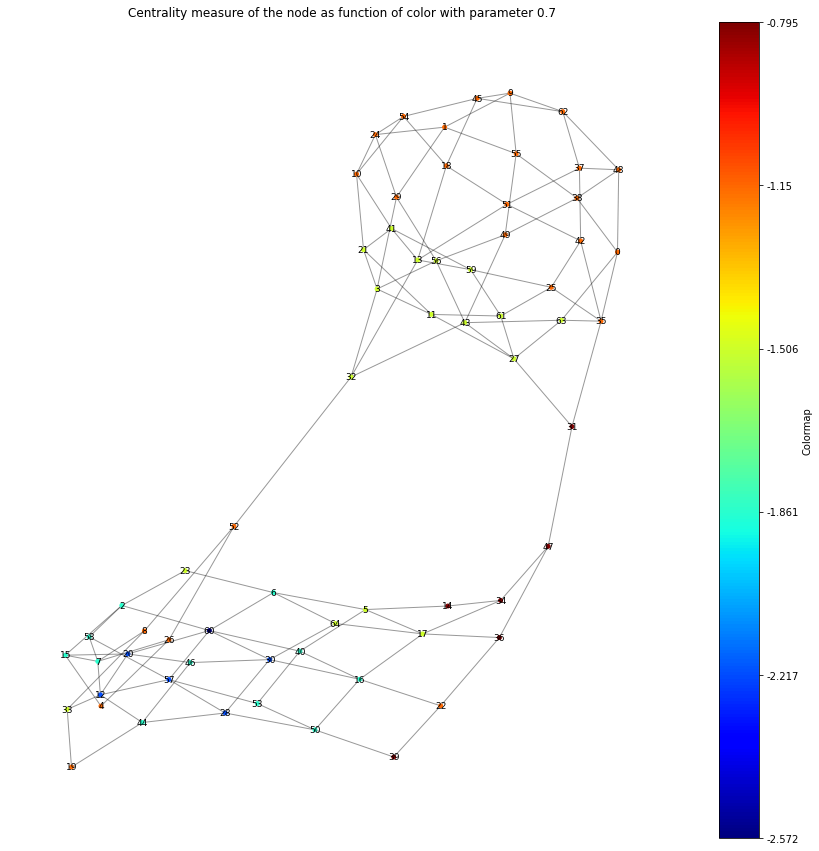

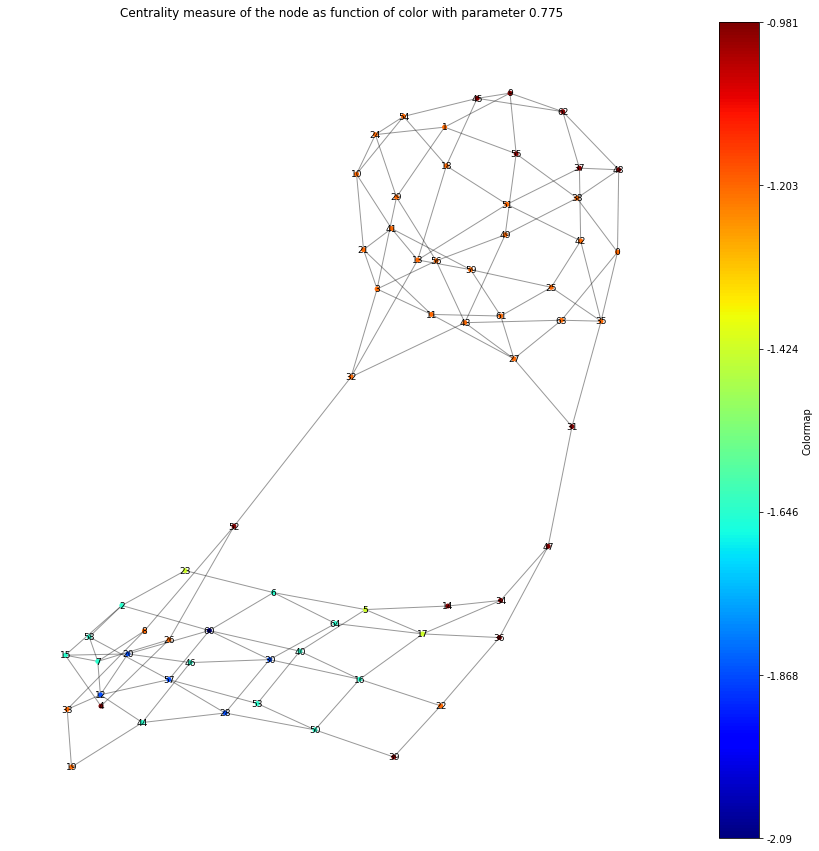

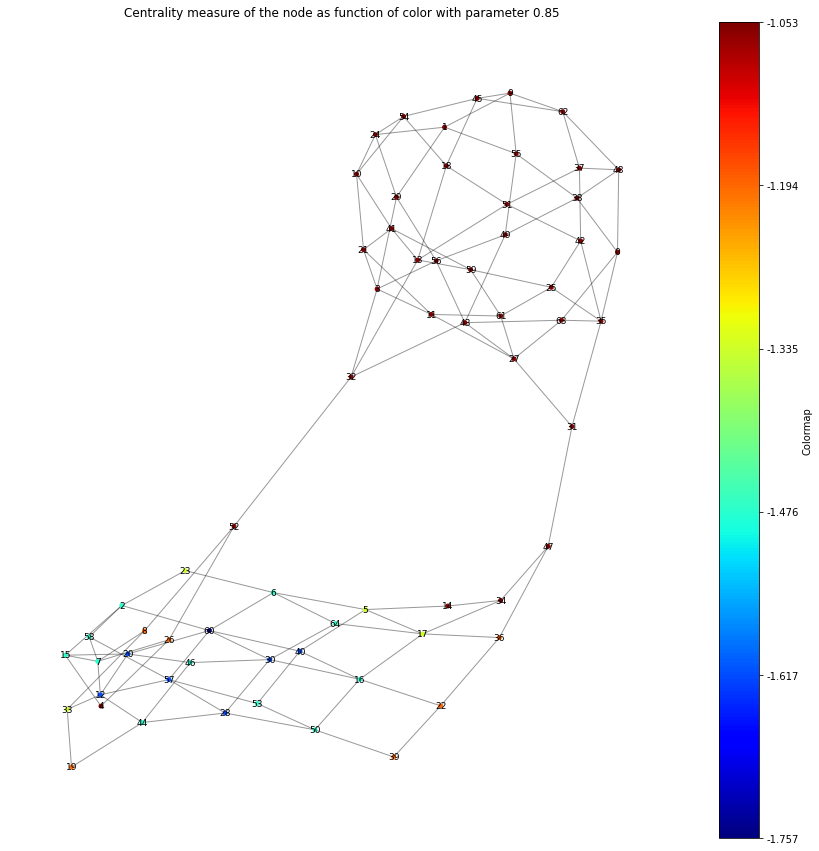

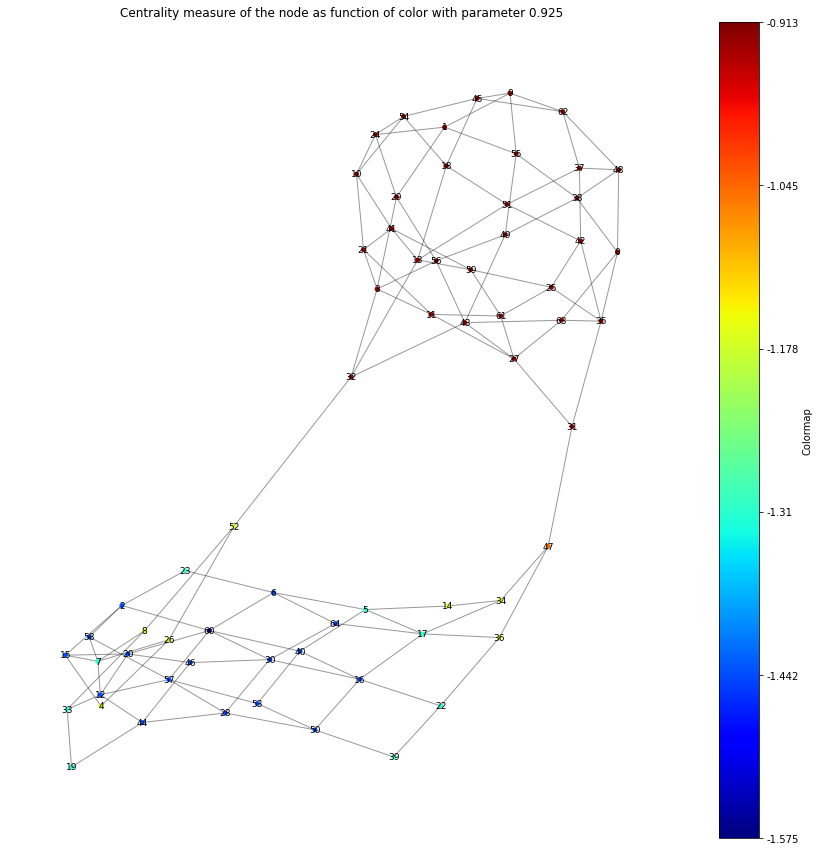

In [19]:
cu.DisplayCentralitiesInGraph(NBTcent, CA.Graph, grid_t, filename="NbtGD96FC")